### Project: Used car price recommender, based on the car specification and user preferences.

<br>

<b>TEAM NAME: CODE MONKEYS</b>
<br>
TEAM GITHUB LINK: https://github.com/kode-monkeys/machine-learning/blob/master/Project/kode_monkeys_project_consolidated_latest.ipynb

<br>
<b>PROBLEM STATEMENT:</b>
<br>
Car sales representatives are masters at tricking us into buying cars. A lot of times they box us into decisions and want us to buy immediately by telling us 'its a one time offer, if you dont commit now, you wont get this amazing deal.We want to come up with a way that a customer can easily go to a portal and say, 'this is the make, model, year, mileage of a car; give me the estimated best sale value'. This will help buyers to take confident decisions. This can also be used by sales to determine good margins for their used cars and also determine if a car can be bought from a seller based on what the current KBB value is.

<br>

<b>BUSINESS GOAL</b>
<br>
The business goal is to help the user/buyer to find the most desirable used car based on their budget and their preferences of the car specification. Based on the features available, what would be the desirable price for the car, setting the right price would help the buyer/seller to conclude the sale efficiently.
<br>
Our project is trying to fulfill two goals. The first is to build a model that predicts the price of a used car based on its specification (so user can know if the asking price for a particular used car is reasonable given the specification provided). Additionally, the kodemonkey will provide a recommended system for the used cars which will recommend a car to the buyer if a car is most recent (year of registration is greater than 2008) and if it has run for less than 100000 KMs and if the car did not have any damage/repair.


<br>
<br>
<b>DATASET</b>
<br>
<br>
Why did we choose to work on this business problem?
<br>
Often when we want to buy a car, we will be falling for the dealer’s presentation of all the cool feature a car has.  But we never know if those features are actually the ones that have the most impact on price of a car.  That’s why we are easi8ly manipulated by the sales person to go for a car that they recommend us without having proper knowledge about the fact that if those features that they are presenting to us are actually the ones that have the significant impact on a car.  So we thought it would be really nice if we can figure out the features that have high impact on a price of a car by applying the Machine Learning Algorithms.  So next time a customer wants to buy a car they would know if the dealer is actually being genuine to them by what they are presenting or they are just trying to make us to buy that specific car.
<br>





### TEAM MEMBERS
<br>
Golnaz Bidabadi
golnaz.bidabadi@sjsu.edu
008022755
<br>
Puja Kawale
puja.kawale@sjsu.edu
012506156
<br>
Supreetha Ganapathi
supreetha.ganapathi@sjsu.edu
011332646
<br>
Swetha Chandrasekar
swetha.chandrasekar@sjsu.edu
012497628
<br>
Vijay Samuel
vijay.samuel@sjsu.edu 
012506546


In [100]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib as mpl
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as plt

from sklearn.metrics import silhouette_score
from matplotlib import colors

import numpy as np
from scipy import stats
import datetime
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn import preprocessing
import seaborn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


%matplotlib inline

import scipy.stats as stats

import sklearn
import statsmodels.api as sm
from sklearn import metrics

from scipy.stats import mode

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

##### Dataset:

https://www.kaggle.com/orgesleka/used-cars-database/
<br>
The dataset consisted of 370K records of used-cars getting sold in the German ebay market.

<b>date_crawled :</b> Date when the selling record was first crawled
<br>
<b>name :</b> Headline posted by the seller
<br>
<b>seller :</b> Whether the seller is a private or dealer
<br>
<b>offertype:</b> Whether the offer is request or completed-deal
<br>
<b>price*:</b> Numerical price of the sold car. Target variable in kaggle competition.
<br>
<b>abtest :</b> Not very useful
<br>
<b>Vehicle type:</b> If the car is a sedan or suv or 3er or jeep
<br>
<b>Year of registration :</b> Year when the car was registered
<br>
<b>gearbox :</b> Automatic or manual
<br>
<b>Power PS :</b> Power of the car
<br>
<b>model :</b> The cars model
<br>
<b>Fuel type :</b> Petrol / diesel/ electric / hybrid etc
<br>
<b>brand :</b> Car brand
<br>
<b>kilometer :</b> Number of kilometers driven
<br>
<b>repaired_damaged :</b> Repaired or damaged
<br>

In [101]:
# import the original dataset from source "https://www.kaggle.com/orgesleka/used-cars-database/"
#DataFrame "data" holds the original dataset downloaded from source
data =  pd.read_csv('C://Users//Supreetha//Box Sync//MSSE//THIRD_SEM//257_ML//datasets//used-cars-database//autos.csv',encoding='Latin1')

In [102]:
data.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [103]:
#Prepare our working dataset "work_data" by dropping columns and NA records to have cleaned dataset
work_data=data.drop('nrOfPictures',1)
print(data.groupby('seller').size())

seller
gewerblich         3
privat        371525
dtype: int64


In [104]:
# since the values for Seller column is one, does not make sense to have it.
work_data = work_data[work_data.seller != 'gewerblich']
work_data=work_data.drop('seller',1)
print(work_data.groupby('offerType').size())

offerType
Angebot    371513
Gesuch         12
dtype: int64


In [105]:
# Same with the column offerType, since its all single values
work_data = work_data[work_data.offerType != 'Gesuch']
work_data=work_data.drop('offerType',1)
#inspecting: name
print(len(work_data.groupby('name').size()), 'different names for all offers')

233517 different names for all offers


In [106]:
# Again, dropping name, abtest column as they are single values
work_data=work_data.drop('name',1)
work_data=work_data.drop('abtest',1)

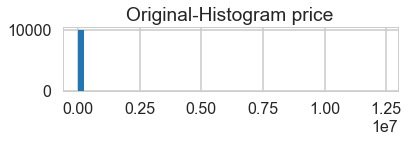

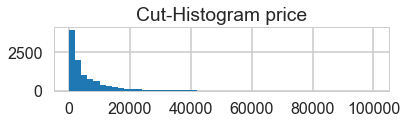

10772 cars with price 0


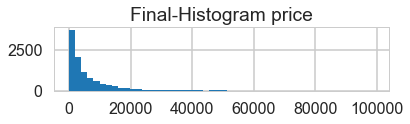

In [107]:
#sample data is temporary dataset just to analyze and plot the histogram
sample_data=work_data.sample(n=10000, random_state=1)
#inspecting: price
plt.subplot(3,1,1)
sample_data['price'].hist(bins=50)
plt.title('Original-Histogram price')
plt.show()
#There are kinda expensive cars on sale. The owners are slightly overestimating the value we guess.

# we decided to cut the price at 100000
work_data = work_data[work_data.price < 100000]
sample_data=work_data.sample(n=10000, random_state=1)

plt.subplot(3,1,2)
sample_data['price'].hist(bins=50)
plt.title('Cut-Histogram price')
plt.show()

#There are 10772 cars with price as 0, so we have to drop them
print(len(work_data[work_data.price == 0]), 'cars with price 0')
work_data = work_data[work_data.price != 0]
sample_data=work_data.sample(n=10000, random_state=1)

plt.subplot(3,1,3)
sample_data['price'].hist(bins=50)
plt.title('Final-Histogram price')
plt.show()

In [108]:
# there are lot of values which are greater than 2018 for yearOfRegistration, which makes no sense.
#dropping the values which are prior to 1863 and after 2017
work_data = work_data[(work_data.yearOfRegistration >= 1863) & (work_data.yearOfRegistration <= 2017)]
print(work_data['yearOfRegistration'].unique())

[1993 2011 2004 2001 2008 1995 2014 1998 2005 1910 2016 2007 2009 2002
 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010 2000 1992
 2013 1996 1985 1989 2015 1968 1982 1976 1983 1959 1973 1969 1971 1987
 1986 1988 1967 1980 1970 1965 1945 1925 1974 1979 1955 1978 1972 1977
 1961 1963 1964 1966 1975 1937 1936 1960 1958 1956 1933 1941 1962 1929
 1951 1957 1940 1949 1953 1935 1954 1950 1948 1952 1932 1927 1923 1931
 1942 1911 1930 1944 1943 1947 1934 1938 1928 1939 1946]


In [109]:
print(work_data['brand'].unique())

['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'seat' 'citroen' 'honda' 'fiat' 'opel'
 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'chrysler' 'jaguar' 'daewoo' 'rover' 'saab'
 'land_rover' 'lada']


In [110]:
#remove data with engine power > 1000
print(work_data['powerPS'].describe())
work_data = work_data[(work_data.powerPS > 0) & (work_data.powerPS < 1000)]

count    356355.000000
mean        116.572558
std         186.866013
min           0.000000
25%          73.000000
50%         107.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64


In [111]:
#Drop NA 
#Creating FINAL dataframe "cleaned data" for our further analysis and transformation.
cleaned_data = work_data
#dropping records which have na as they are not relvant
cleaned_data.dropna(inplace = True)
cleaned_data.head(5)

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,2016-03-17 16:54:04,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224,2016-04-06 10:45:34


count    247879.000000
mean        129.290077
std          62.041502
min           1.000000
25%          86.000000
50%         116.000000
75%         158.000000
max         999.000000
Name: powerPS, dtype: float64


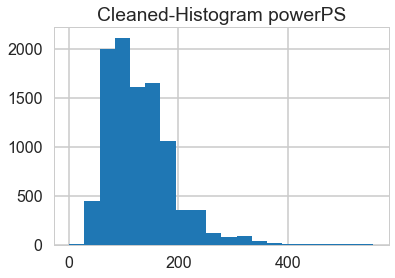

In [112]:
#Inspect powerPS column and plot it using histogram to see the distribution
column_name_you_want_to_inspect='powerPS'
print(cleaned_data[column_name_you_want_to_inspect].describe())

sample_data=cleaned_data.sample(n=10000, random_state=1)
sample_data[column_name_you_want_to_inspect].hist(bins=20)
plt.title('Cleaned-Histogram ' + column_name_you_want_to_inspect)
plt.show()

In [113]:
cleaned_data.head(5)

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,2016-03-17 16:54:04,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224,2016-04-06 10:45:34


In [114]:
#Converting text from german to english for the column "gearbox"
cleaned_data['gearbox']=np.where(cleaned_data['gearbox']=='manuell','manual',cleaned_data['gearbox'])
cleaned_data['gearbox']=np.where(cleaned_data['gearbox']=='automatik','automatic',cleaned_data['gearbox'])
print(cleaned_data['gearbox'].unique())

['manual' 'automatic']


In [115]:
#Converting text from german to english for the column "fuelType"
cleaned_data['fuelType']=np.where(cleaned_data['fuelType']=='benzin','petrol',cleaned_data['fuelType'])
cleaned_data['fuelType']=np.where(cleaned_data['fuelType']=='elektro','electric',cleaned_data['fuelType'])
cleaned_data['fuelType']=np.where(cleaned_data['fuelType']=='andere','other',cleaned_data['fuelType'])
print(cleaned_data['fuelType'].unique())

['petrol' 'diesel' 'lpg' 'other' 'hybrid' 'cng' 'electric']


In [116]:
#Converting text from german to english for the column "vehicleType"
cleaned_data['vehicleType']=np.where(cleaned_data['vehicleType']=='kleinwagen','smallcar',cleaned_data['vehicleType'])
cleaned_data['vehicleType']=np.where(cleaned_data['vehicleType']=='kombi','Midsize',cleaned_data['vehicleType'])
cleaned_data['vehicleType']=np.where(cleaned_data['vehicleType']=='andere','other',cleaned_data['vehicleType'])
cleaned_data['vehicleType']=np.where(cleaned_data['vehicleType']=='limousine','van',cleaned_data['vehicleType'])
print(cleaned_data['vehicleType'].unique())

['smallcar' 'van' 'cabrio' 'Midsize' 'suv' 'bus' 'coupe' 'other']


In [117]:
#Converting text from german to english for the column "notRepairedDamage"
cleaned_data['notRepairedDamage']=np.where(cleaned_data['notRepairedDamage']=='ja','yes',cleaned_data['notRepairedDamage'])
cleaned_data['notRepairedDamage']=np.where(cleaned_data['notRepairedDamage']=='nein','no',cleaned_data['notRepairedDamage'])
print(cleaned_data['notRepairedDamage'].unique())

['no' 'yes']


In [118]:
print(cleaned_data['kilometer'].describe())

count    247879.000000
mean     123733.716854
std       39854.996502
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64


##### Identifying the Latent variable : kode monkeys recommended variable 
<br>
Based on the information provided in the used car dataset as well as the  research we did around what people look at when they want to buy a used car we felt one key information that was missing that could help user to find an appropriate car was the recommendation flag based on:
<br>
If a car is most recent ( year of registration is greater than 2008) and if car has run for less than 100000 KMs and if the car did not have any damage/repair then we recommend the car to the buyer.
<br>
We have a variable, year of registration in the dataset. We created latent variable "years old" to derive how old the car was and see if this variable influences our target price variable.
<br>
We have used both the variables we created in all our analysis.

In [119]:
# ENRICHING our dataset by cleaning/standardizing/adding derived columns
pd.options.mode.chained_assignment = None
import math
#Converting date crawled to a date-time format
cleaned_data['date_crawled']= pd.to_datetime(cleaned_data['dateCrawled'])
# year registered has to be a categorical variable, so converting to STRING datatype
cleaned_data['year_registered'] = cleaned_data['yearOfRegistration'].apply(lambda x: str(x))
# month registered registered has to be a categorical variable, so converting to STRING datatype
cleaned_data['month_registered'] = cleaned_data['monthOfRegistration'].apply(lambda x: str(x))
#deriving date crawled in the correct format
cleaned_data['date_crawled_year']= cleaned_data['dateCrawled'].apply(lambda x: int(x.split('-')[0]))
#deriving the variable, HOW OLD is the car based on the crawled year vs year of Registration
cleaned_data['yearsOld'] =  cleaned_data['date_crawled_year'] - cleaned_data['yearOfRegistration'] ;

In [120]:
cleaned_data['kodemonkeysrecommended']  = cleaned_data.apply(lambda x: 1 if (x['yearOfRegistration']>=2008 and x['kilometer']<=100000 and x['notRepairedDamage']=='no') else 0,axis=1)

In [121]:
print(cleaned_data['price'].unique())

[ 1500  3600   650 ... 24895 10985 14989]


In [122]:
print(cleaned_data['price'].describe())

count    247879.000000
mean       6787.946672
std        8030.154266
min           1.000000
25%        1690.000000
50%        3999.000000
75%        8900.000000
max       99999.000000
Name: price, dtype: float64


##### Creating our target categorical variable to set if the car is expensive or not. we created a range based on price distribution that we obtained from the dataset
<br>
<b>less expensive:</b> When the price is between (0,1690)
<br>
<b>mid low expensive:</b> When the price is between (1691,3999)
<br>
<b>mid high expensive:</b> When the price is between (4000,8900)
<br>
<b>expensive:</b> Any car costing more than 8901 EUR is tagged as less expensive
<br>


In [123]:
conds = [cleaned_data.price.between(0,1690), cleaned_data.price.between(1691,3999),
         cleaned_data.price.between(4000,8900), cleaned_data.price.between(8901,100000)]


choices = ['less_expensive','mid_low_expensive','mid_high_expensive','expensive']


cleaned_data['expense_range'] = np.select(conds,choices, 'other')

#### Data Analysis

In [124]:
print(cleaned_data['expense_range'].unique())

['less_expensive' 'mid_low_expensive' 'expensive' 'mid_high_expensive']


Text(0.5,1,'Boxplot of price  by Less or More Expensive classifier')

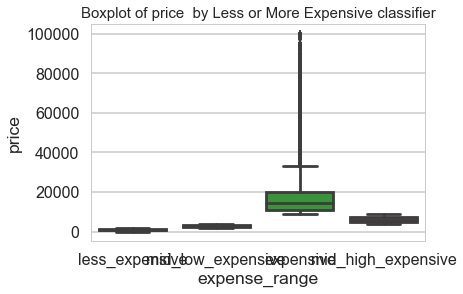

In [87]:
# plotting a box plot to see the variation of price for classifier expensive or not
seaborn.boxplot( x = 'expense_range', y = 'price', data = cleaned_data, orient = 'v' )
plt.title( "Boxplot of price  by Less or More Expensive classifier", fontsize = 15)

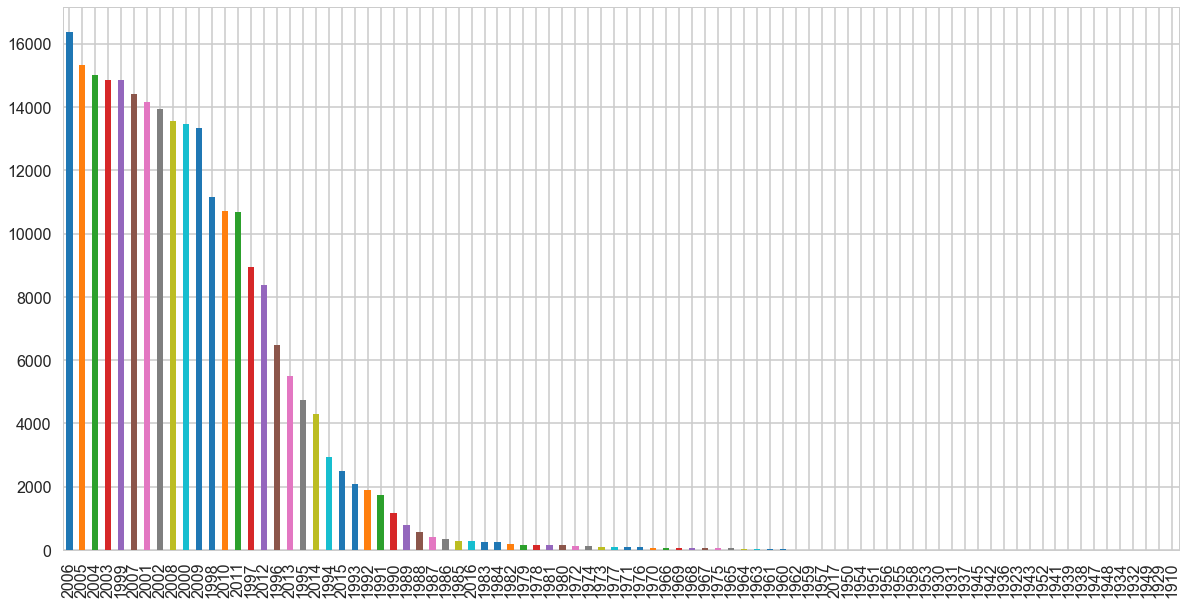

In [88]:
# Created this dataset "count_of_car_by_year" to display the count of cars against the year of registration 
# we can see that 85-90% of the cars listed are registered between 2004 to 2012
count_of_car_by_year=cleaned_data[['yearOfRegistration','brand']]
count_of_car_by_year['yearOfRegistration'].value_counts().plot(kind='bar',figsize=(20,10))
#print(count_of_car_by_year['yearOfRegistration'].value_counts().sort_values())

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


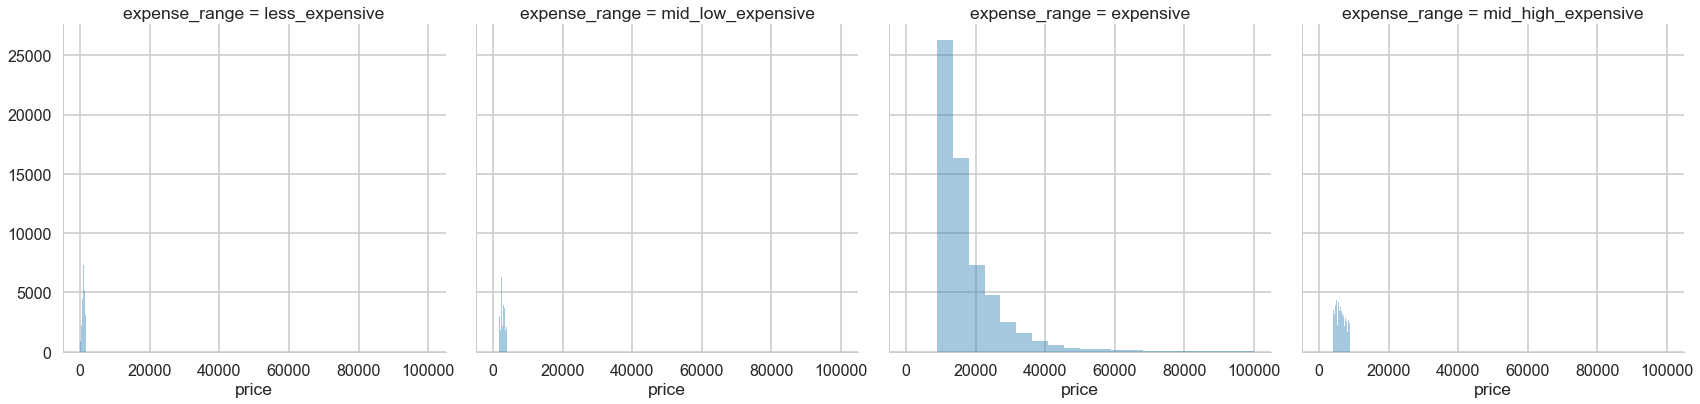

In [89]:
# g is the dataset that holds data from original "cleaned data" against the price considering the classifier variable
# we can see that there are more expensive cars listed than the less expensive one's
g = seaborn.FacetGrid(cleaned_data, col="expense_range", size = 6)
g.map(seaborn.distplot, "price", kde = False, bins = 20 )

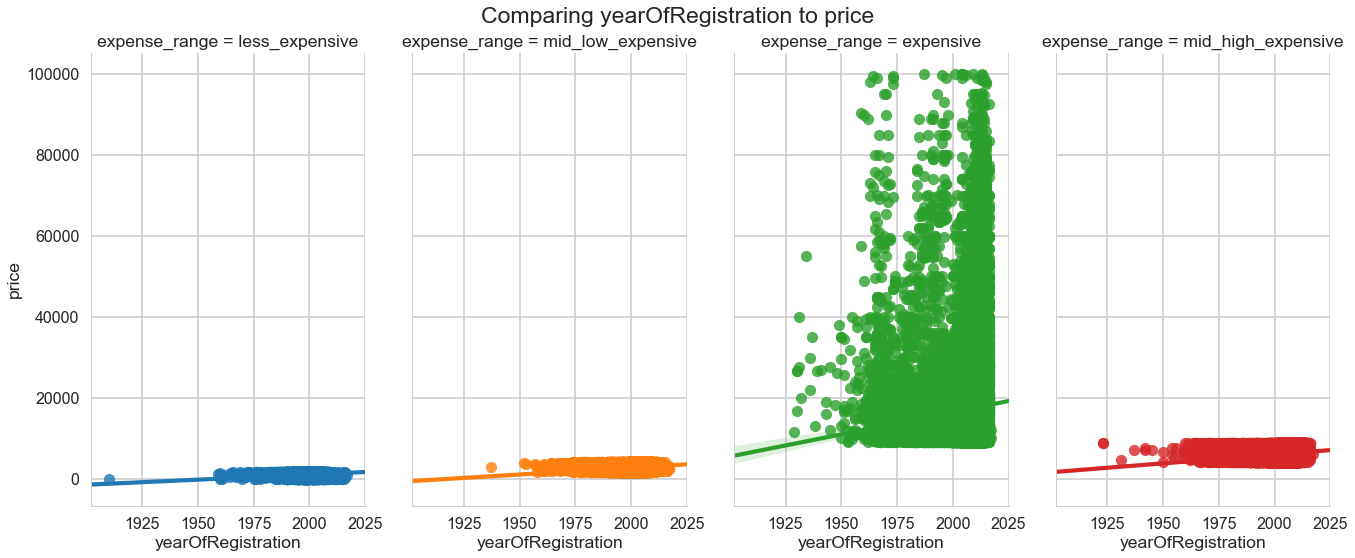

In [90]:
# creating a implot to show the variation of price against year of registration
# we can clearly see that more recent is the car, more expensive it is from this data
yearOfRegistration_vs_price_plots = seaborn.lmplot(x='yearOfRegistration', y='price', data=cleaned_data, 
                                                   hue='expense_range', col='expense_range', size=8, aspect=.6)
plt.subplots_adjust(top=0.9)
yearOfRegistration_vs_price_plots.fig.suptitle("Comparing yearOfRegistration to price")
yearOfRegistration_vs_price_plots.set_axis_labels("yearOfRegistration", "price")

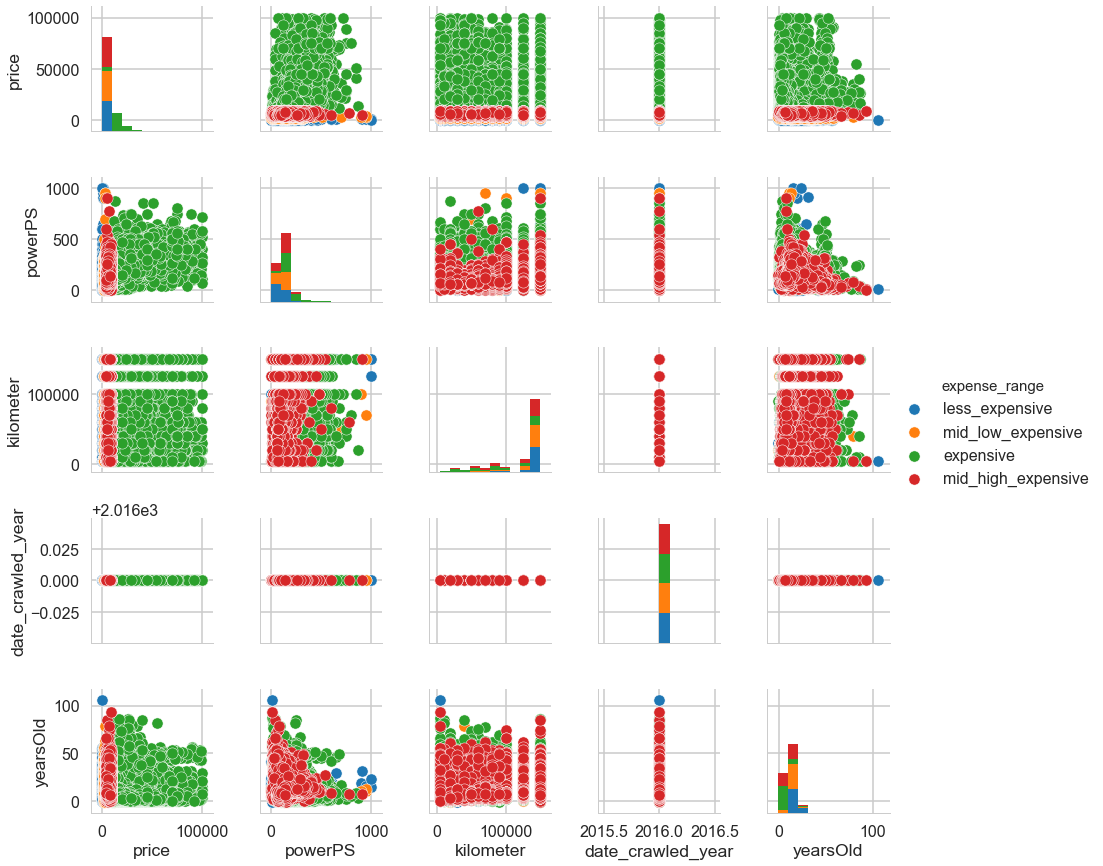

In [91]:
# Created this subset "cleaned_data_numeric" to display pairplot of numeric data to see the distribution
cleaned_data_numeric=cleaned_data[['price','powerPS','kilometer','date_crawled_year',
                                   'yearsOld','expense_range']]
sns.pairplot(cleaned_data_numeric,hue = 'expense_range')

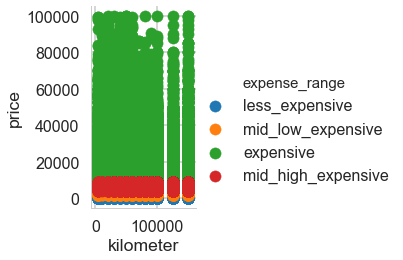

In [94]:
# Lets analyze the numerical data based on our categorical classification of whether car is expensive or not
sns.FacetGrid(cleaned_data_numeric, hue="expense_range", size=4) \
   .map(plt.scatter, "kilometer","price") \
   .add_legend();

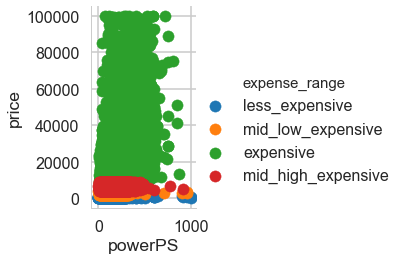

In [95]:
# scatter plot for powerPS vs price. 
# we can see that extreme high values for powerPS are for less expensive cars. Must be bad data
sns.FacetGrid(cleaned_data_numeric, hue="expense_range", size=4) \
   .map(plt.scatter, "powerPS","price") \
   .add_legend();

In [125]:
# Some of the columns have been converted to STRING and hence original INTEGER columns are no longer needed
# So created final dataset "super_cleaned_data"
super_cleaned_data=cleaned_data
super_cleaned_data.head(5)

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,...,dateCreated,postalCode,lastSeen,date_crawled,year_registered,month_registered,date_crawled_year,yearsOld,kodemonkeysrecommended,expense_range
3,2016-03-17 16:54:04,1500,smallcar,2001,manual,75,golf,150000,6,petrol,...,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016-03-17 16:54:04,2001,6,2016,15,0,less_expensive
4,2016-03-31 17:25:20,3600,smallcar,2008,manual,69,fabia,90000,7,diesel,...,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,2016-03-31 17:25:20,2008,7,2016,8,1,mid_low_expensive
5,2016-04-04 17:36:23,650,van,1995,manual,102,3er,150000,10,petrol,...,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,2016-04-04 17:36:23,1995,10,2016,21,0,less_expensive
6,2016-04-01 20:48:51,2200,cabrio,2004,manual,109,2_reihe,150000,8,petrol,...,2016-04-01 00:00:00,67112,2016-04-05 18:18:39,2016-04-01 20:48:51,2004,8,2016,12,0,mid_low_expensive
10,2016-03-26 19:54:18,2000,van,2004,manual,105,3_reihe,150000,12,petrol,...,2016-03-26 00:00:00,96224,2016-04-06 10:45:34,2016-03-26 19:54:18,2004,12,2016,12,0,mid_low_expensive


In [126]:
super_cleaned_data=super_cleaned_data.drop('dateCrawled',1)
super_cleaned_data=super_cleaned_data.drop('yearOfRegistration',1)
super_cleaned_data=super_cleaned_data.drop('monthOfRegistration',1)
super_cleaned_data.head(5)

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,date_crawled,year_registered,month_registered,date_crawled_year,yearsOld,kodemonkeysrecommended,expense_range
3,1500,smallcar,manual,75,golf,150000,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016-03-17 16:54:04,2001,6,2016,15,0,less_expensive
4,3600,smallcar,manual,69,fabia,90000,diesel,skoda,no,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,2016-03-31 17:25:20,2008,7,2016,8,1,mid_low_expensive
5,650,van,manual,102,3er,150000,petrol,bmw,yes,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,2016-04-04 17:36:23,1995,10,2016,21,0,less_expensive
6,2200,cabrio,manual,109,2_reihe,150000,petrol,peugeot,no,2016-04-01 00:00:00,67112,2016-04-05 18:18:39,2016-04-01 20:48:51,2004,8,2016,12,0,mid_low_expensive
10,2000,van,manual,105,3_reihe,150000,petrol,mazda,no,2016-03-26 00:00:00,96224,2016-04-06 10:45:34,2016-03-26 19:54:18,2004,12,2016,12,0,mid_low_expensive


In [127]:
super_cleaned_data.columns

Index(['price', 'vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer',
       'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode',
       'lastSeen', 'date_crawled', 'year_registered', 'month_registered',
       'date_crawled_year', 'yearsOld', 'kodemonkeysrecommended',
       'expense_range'],
      dtype='object')

###### Clustering

<b>K-Means</b>
<br>
There are multiple questions that could be answered with the help of this dataset. For k-means clustering, which is a unsupervised type of learning, we were trying to understand the different type of clusters formed based on the variables used in the prediction. Based on the different variables we used to plot a 2-D k-means chart, we tried to see whether data was too sparse or reasonable clusters were getting formed. We could also answer questions such as : how is the car price varying based on the kilometer driven on the car or power of the car, also what is the influence of year of regirstration on the target price for the car.
    

In [128]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247879 entries, 3 to 371527
Data columns (total 22 columns):
dateCrawled               247879 non-null object
price                     247879 non-null int64
vehicleType               247879 non-null object
yearOfRegistration        247879 non-null int64
gearbox                   247879 non-null object
powerPS                   247879 non-null int64
model                     247879 non-null object
kilometer                 247879 non-null int64
monthOfRegistration       247879 non-null int64
fuelType                  247879 non-null object
brand                     247879 non-null object
notRepairedDamage         247879 non-null object
dateCreated               247879 non-null object
postalCode                247879 non-null int64
lastSeen                  247879 non-null object
date_crawled              247879 non-null datetime64[ns]
year_registered           247879 non-null object
month_registered          247879 non-null object
date_

In [94]:
# Take the numerical columns and without scaling run the elbow method to determine the number of clusters

# When we took all the below numerical columns for k-means analysis, it was crashing the kernel
# So we reduced the number of columns
#X = super_cleaned_data[['price', 'powerPS','kilometer', 'yearsOld']]

# Even with two columns data, kernal was still crashing
#X = super_cleaned_data[['price','yearsOld']]

# So we considered only one year worth of data
cluster_data=super_cleaned_data
cluster_data=cluster_data[(super_cleaned_data['year_registered'].str.contains("2014"))]
cluster_data=cluster_data[['price','kilometer']]
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 56 to 371500
Data columns (total 2 columns):
price        4302 non-null float64
kilometer    4302 non-null int64
dtypes: float64(1), int64(1)
memory usage: 100.8 KB


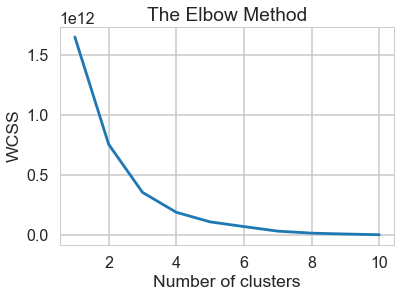

In [95]:
#cluster_data=cleaned_data[(cleaned_data.yearOfRegistration >= 2015) & 
#                                (cleaned_data.yearOfRegistration <= 2017)]
#cluster_data=cleaned_data[['price','kilometer','yearsOld']]

X=cluster_data

#X.info()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [102]:
# Lets apply k-means on scaled data and check the silhouette score
cluster_count = 4
model = KMeans(n_clusters=cluster_count)
kmeans = model.fit(X)
label = kmeans.labels_
sil_coeff = silhouette_score(X, label, metric='euclidean')
scores = kmeans.score(X)
print (scores)
print("Number of Clusters = {}, The Silhouette Coefficient is {}".format(cluster_count, sil_coeff))

-673985729705.259
Number of Clusters = 4, The Silhouette Coefficient is 0.4149501650662174


In [103]:
# This is to print the label per point for K-means clusters
predict_label_per_point = model.predict(X)
import collections
collections.Counter(predict_label_per_point)

Counter({0: 777, 2: 1122, 3: 2307, 1: 96})

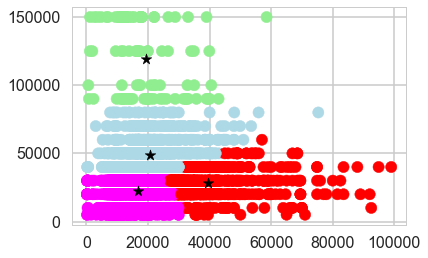

In [104]:
# There are 4 clusters, Counter({0: 777, 2: 1122, 3: 2307, 1: 96})
#price vs years Old
color_map=['red', 'lightgreen', 'lightblue','magenta']
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=predict_label_per_point, 
            cmap=colors.ListedColormap(color_map))
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='*');
plt.show()

In [105]:
#above graph says optimal k is 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

cluster_data["cluster"] = 4-y_kmeans
cols = list(cluster_data.columns)

<b>Principal Component Analysis[PCA]</b>
<br>
We are using the PCA to reduce our dataset into a lower dimensions while still preserving the more importent feature within it.


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


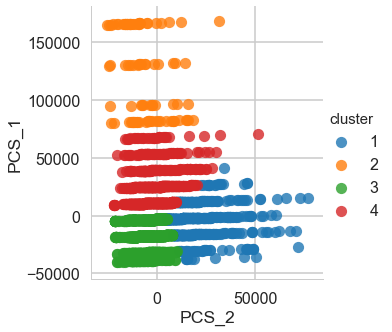

In [107]:
X = cluster_data.iloc[:, :-1]
Y = cluster_data['cluster']

from sklearn.preprocessing import StandardScaler
col_names = ['price','kilometer']
X_std = X.copy()
features = X_std[col_names]
scaler = StandardScaler().fit_transform(features.values)
X_std[col_names] = features

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

cluster_data["PCS_1"] = Y_sklearn[:,0]
cluster_data["PCS_2"] = Y_sklearn[:,1]
sns.lmplot("PCS_2","PCS_1", data=cluster_data, hue='cluster',fit_reg=False)

plt.show()

###### Gaussian Mixture Model
1.Perform clustering using GMM and hierarchical clustering methods.
<br>
2.Use Gaussian mixture model as a generative model and generate samples similar to given dataset.
<br>
3.Evaluate the clusters and compare the performance of k-means, GMM & hierarchical clustering.
<br>
4.Report any new findings.
<br>


<b>Bayesian Information Criterion and Akaike Information criterion</b>
<br>
We used elbow method in k-means clustering to find the optimal number of components.
<br>
If we observe the elbow method, the score continues to increase with increase in number of clusters. However it does not mean its optimal to increase the number of clusters.
<br>
While clustering, its possible to achieve lesser loss or higher score simply by increasing the number of components.
<br>
Metric like Bayesian Information Criterion and Akaike Information criterion prevents overfitting.[courtesy:wikipedia]
<br>
From the plot below, we can see, AIC and BIC curve seem to diverge from number_of_components=4 (x-axis).


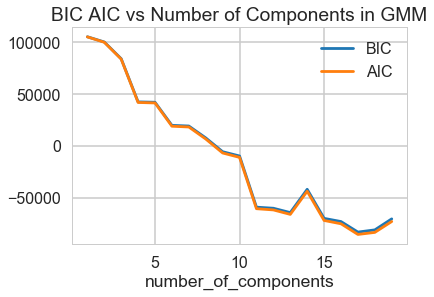

In [108]:
# By running a comparison of AIC vs BIC on our data, we come to a conclusion that number of ideal clusters would be 
gmm_models = [GaussianMixture(n_components=i,
                              covariance_type='full',max_iter=5000).fit(cluster_data.values) 
              for i in range(1,20)] 
n_components = [i for i in range(1,20)]
plt.plot(n_components, [m.bic(cluster_data.values) for m in gmm_models], label='BIC')
plt.plot(n_components, [m.aic(cluster_data.values) for m in gmm_models], label='AIC')
plt.title("BIC AIC vs Number of Components in GMM")
plt.legend(loc='best')
plt.xlabel('number_of_components');

In [109]:
from matplotlib.patches import Ellipse
import numpy as np
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

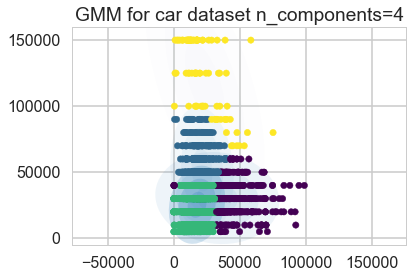

In [110]:
# from the analysis, we determined that the number of components is 4
number_of_components=4
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=number_of_components,covariance_type='full',verbose=0,verbose_interval=10,
                      max_iter=5000).fit(cluster_data.values)
labels = gmm.predict(cluster_data.values)
test_features= ['price','kilometer']
X = cluster_data[test_features].values
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis');
plt.title("GMM for car dataset n_components=4")
plot_gmm(gmm,X)

GMM is a mixture of normal distributions where the parameters of each normal distribution are mean and variance. 
<br>
After fitting a gaussian mixture model, we were able to use it as a generative model.
<br>
We  generated random 1000 data points for 4 components that resembled the original dataset.
<br>


In [ ]:
#density estimation using GMM as generator
gmm = GaussianMixture(n_components=number_of_components,covariance_type='full', random_state=0)
model = gmm.fit(cluster_data.values)
(genX, genY) = model.sample(500)
plt.scatter(genX[:,0], genX[:,1],c=genY,s=10,cmap='viridis')
test_features= ['price','kilometer']
X = cluster_data[test_features].values
plt.title("GMM as Generator")
genX = genX[:,[0,1]]
plot_gmm(gmm,genX)

In [ ]:
#Hierarchial Clustering using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
HC = AgglomerativeClustering(n_clusters=number_of_components, linkage='ward')
HC.fit(cluster_data.values)
test_features= ['price','kilometer']
X = cluster_data[test_features].values
plt.scatter(X[:, 0], X[:, 1], c=HC.labels_, s=20, cmap='viridis');
plt.title("hierarchial clustering for car dataset n_components=4")
plt.xlabel("price")
plt.ylabel("kilometer")

Comparing silhoutte score K means, GMM, Hierarchial Clustering for 4 components

In [ ]:
from sklearn.metrics import silhouette_score
silhoutte_coefficients = []
gmm = GaussianMixture(n_components=number_of_components,covariance_type='spherical',verbose=0,
                      verbose_interval=10,max_iter=5000).fit(cluster_data.values)
gmm_labels = gmm.predict(cluster_data.values)
gmm_silhoute_score = silhouette_score(cluster_data, gmm_labels, metric='euclidean')

kmeans = KMeans( init='k-means++',n_clusters=number_of_components)
kmeans_model = kmeans.fit(cluster_data)
kmeans_labels = kmeans_model.labels_
kmeans_silhoute_score = silhouette_score(cluster_data, kmeans_labels, metric='euclidean')

HC = AgglomerativeClustering(n_clusters=number_of_components, linkage='ward')
HC.fit(cluster_data.values)
HC_silhoute_score = silhouette_score(cluster_data, HC.labels_, metric='euclidean')

print ("Silhoutte score for Kmeans:",kmeans_silhoute_score, "GMM:", gmm_silhoute_score, 
       "Hierarchial Clustering:",HC_silhoute_score)

###### Linear Regression
Linear regression attempts to model the relationship between two features by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example,in our case,  a modeler want to relate the kilometer driven on the Car to its Price using a linear regression model.
<br>
A linear regression line has an equation of the form Y = c + mX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is m, and c is the intercept (the value of y when x = 0).


In [50]:
# WE took the Age of the car as  X component and our target variable being the price
X_lin = super_cleaned_data[['yearsOld']]
y_lin = super_cleaned_data[['price']]

In [51]:
# Split X and y into X_
# since the data is highly skewed, we assume for the low prediction, may be log transformation of data may lead to better prediction
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.4, random_state=1)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
reg_model.score(X_test, y_test)

0.3472074533894405

We got accuracy of 34.7% when we used age of the car against our target variable price

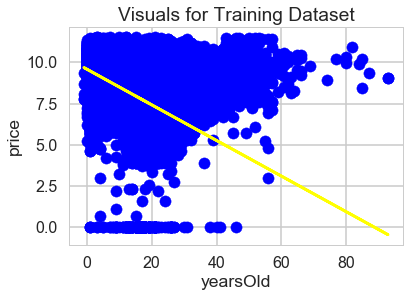

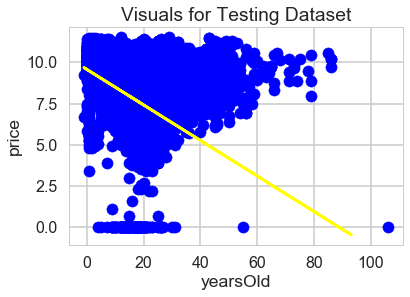

In [52]:
y_pred = reg_model.predict(X_test) 

#Visualizing the training Test Results 
plt.scatter(X_train, y_train, color= 'blue')
plt.plot(X_train, reg_model.predict(X_train), color = 'yellow')
plt.title ("Visuals for Training Dataset")
plt.xlabel("yearsOld")
plt.ylabel("price")
plt.show()

#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'blue')
plt.plot(X_train, reg_model.predict(X_train), color = 'yellow')
plt.title ("Visuals for Testing Dataset")
plt.xlabel("yearsOld")
plt.ylabel("price")
plt.show()

In [53]:
lm  = LinearRegression()

#lm.fit(X_train, y_train)

model = sm.OLS(y_test, X_test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                 2.439e+05
Date:                Tue, 23 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:23:38   Log-Likelihood:            -2.8919e+05
No. Observations:               99152   AIC:                         5.784e+05
Df Residuals:                   99151   BIC:                         5.784e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yearsOld       0.4988      0.001    493.870      0.000       0.497       0.501
==============================================================================
Omnibus:                     7905.717   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14852.574
Skew:                          -0.563   Prob(JB):                         0.00
Kurtosis:                       4.525   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Multiple Linear Regression
<br>
Since the linear regression did not yeild the desired output, we tried to see the result using multiple linear regression
<br>
the X component is now enhanced with new columns "years Old" and power of the car

In [116]:
# multiple linear regression

X_mlin = super_cleaned_data[['yearsOld','kilometer','powerPS']]
y_mlin = super_cleaned_data[['price']]

In [117]:
# With multiple linear regression, the accuracy increased to 60% from 22% in Single linear regression

X_train, X_test, y_train, y_test = train_test_split(X_mlin, y_mlin, test_size=0.4, random_state=1)

mreg_model = LinearRegression()
mreg_model.fit(X_train, y_train)
mreg_model.score(X_test, y_test)

0.590898547673133

In [118]:
model = sm.OLS(y_test,X_test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 7.888e+04
Date:                Tue, 23 Oct 2018   Prob (F-statistic):               0.00
Time:                        14:13:25   Log-Likelihood:            -9.9819e+05
No. Observations:               99152   AIC:                         1.996e+06
Df Residuals:                   99149   BIC:                         1.996e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yearsOld    -119.1807      3.044    -39.157      0.000    -125.146    -113.215
kilometer     -0.0360      0.000    -87.141      0.000      -0.037      -0.035
powerPS       93.7915      0.245    382.874      0.000      93.311      94.272
==============================================================================
Omnibus:                    48065.330   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1509125.964
Skew:                           1.728   Prob(JB):                         0.00
Kurtosis:                      21.797   Cond. No.                     2.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Logistic Regression
The original dataset was intended for predicting the price of the used-car. It was a regression problem. We reformulated it into a classification problem. 
<br>
We took the percentile range of values for price and classified the target variable 'expense_range'
<br>

Creating categorical variables using One-hot-encoding
<br>
There were several categorical variables like
<br>
Fuel type
<br>
Gear box type
<br>
Vehicle type 
<br>
Model
<br>
Brand
<br>
Had it been repaired?
<br>
We used a technique called one-hot-encoding to convert these categorical variables into a set of boolean features for the Logistic Regression.
<br>


In [129]:
print(super_cleaned_data['fuelType'].unique())

['petrol' 'diesel' 'lpg' 'other' 'hybrid' 'cng' 'electric']


In [130]:
super_cleaned_data['gearbox_category'] = super_cleaned_data['gearbox'].apply(lambda x: 0 if (x == 'manual') else 1)


final_data = super_cleaned_data;
# there are 7 unique fuel types, we can create a categorical variable for each one of them
#array(['benzin', 'diesel', 'lpg', 'other', 'hybrid', 'cng', 'electric'],
final_data['benzin'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'benzin') else 0)
final_data['diesel'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'diesel') else 0)
final_data['lpg'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'lpg') else 0)
final_data['other'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'other') else 0)
final_data['hybrid'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'hybrid') else 0)
final_data['cng'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'cng') else 0)
final_data['electric'] = final_data['fuelType'].apply(lambda x : 1 if (x == 'electric') else 0)

In [131]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247879 entries, 3 to 371527
Data columns (total 27 columns):
price                     247879 non-null int64
vehicleType               247879 non-null object
gearbox                   247879 non-null object
powerPS                   247879 non-null int64
model                     247879 non-null object
kilometer                 247879 non-null int64
fuelType                  247879 non-null object
brand                     247879 non-null object
notRepairedDamage         247879 non-null object
dateCreated               247879 non-null object
postalCode                247879 non-null int64
lastSeen                  247879 non-null object
date_crawled              247879 non-null datetime64[ns]
year_registered           247879 non-null object
month_registered          247879 non-null object
date_crawled_year         247879 non-null int64
yearsOld                  247879 non-null int64
kodemonkeysrecommended    247879 non-null int64
expens

In [132]:
print(super_cleaned_data['vehicleType'].unique())

['smallcar' 'van' 'cabrio' 'Midsize' 'suv' 'bus' 'coupe' 'other']


In [133]:
# there are 8 unique vehicle types. We can create a categorical variable for each one of them
final_data['smallcar'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'smallcar') else 0)
final_data['cabrio'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'cabrio') else 0)
final_data['van'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'van') else 0)
final_data['Midsize'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'Midsize') else 0)
final_data['suv'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'suv') else 0)
final_data['bus'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'bus') else 0)
final_data['coupe'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'coupe') else 0)
final_data['VehicleTypeother'] = final_data['vehicleType'].apply(lambda x : 1 if (x == 'other') else 0)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247879 entries, 3 to 371527
Data columns (total 35 columns):
price                     247879 non-null int64
vehicleType               247879 non-null object
gearbox                   247879 non-null object
powerPS                   247879 non-null int64
model                     247879 non-null object
kilometer                 247879 non-null int64
fuelType                  247879 non-null object
brand                     247879 non-null object
notRepairedDamage         247879 non-null object
dateCreated               247879 non-null object
postalCode                247879 non-null int64
lastSeen                  247879 non-null object
date_crawled              247879 non-null datetime64[ns]
year_registered           247879 non-null object
month_registered          247879 non-null object
date_crawled_year         247879 non-null int64
yearsOld                  247879 non-null int64
kodemonkeysrecommended    247879 non-null int64
expens

In [134]:
# there are 35+ models, we take top models only
final_data['golf'] = final_data['model'].apply(lambda x : 1 if (x == 'golf') else 0)
final_data['fabia'] = final_data['model'].apply(lambda x : 1 if (x == 'fabia') else 0)
final_data['3er'] = final_data['model'].apply(lambda x : 1 if (x == '3er') else 0)
final_data['polo'] = final_data['model'].apply(lambda x : 1 if (x == 'polo') else 0)
final_data['corsa'] = final_data['model'].apply(lambda x : 1 if (x == 'corsa') else 0)
final_data['a4'] = final_data['model'].apply(lambda x : 1 if (x == 'a4') else 0)
final_data['passat'] = final_data['model'].apply(lambda x : 1 if (x == 'passat') else 0)
final_data['astra'] = final_data['model'].apply(lambda x : 1 if (x == 'astra') else 0)
final_data['5er'] = final_data['model'].apply(lambda x : 1 if (x == '5er') else 0)
final_data['c_klasse'] = final_data['model'].apply(lambda x : 1 if (x == 'c_klasse') else 0)

In [135]:
final_data['volkswagen'] = final_data['brand'].apply(lambda x : 1 if (x == 'volkswagen') else 0)
final_data['bmw'] = final_data['brand'].apply(lambda x : 1 if (x == 'bmw') else 0)
final_data['mercedes_benz'] = final_data['brand'].apply(lambda x : 1 if (x == 'mercedes_benz') else 0)
final_data['skoda'] = final_data['brand'].apply(lambda x : 1 if (x == 'skoda') else 0)

final_data['opel'] = final_data['brand'].apply(lambda x : 1 if (x == 'opel') else 0)
final_data['audi'] = final_data['brand'].apply(lambda x : 1 if (x == 'audi') else 0)

final_data['ford'] = final_data['brand'].apply(lambda x : 1 if (x == 'ford') else 0)
final_data['renault'] = final_data['brand'].apply(lambda x : 1 if (x == 'renault') else 0)
final_data['porsche'] = final_data['brand'].apply(lambda x : 1 if (x == 'porsche') else 0)
final_data['jaguar'] = final_data['brand'].apply(lambda x : 1 if (x == 'jaguar') else 0)


final_data['repaired'] = final_data['notRepairedDamage'].apply(lambda x : 0 if (x=='nein') else 1)
final_data['peugeot'] = final_data['brand'].apply(lambda x : 1 if (x == 'peugeot') else 0)
final_data['fiat'] = final_data['brand'].apply(lambda x : 1 if (x == 'fiat') else 0)
final_data['seat'] = final_data['brand'].apply(lambda x : 1 if (x == 'seat') else 0)
final_data['toyota'] = final_data['brand'].apply(lambda x : 1 if (x == 'toyota') else 0)
final_data['nissan'] = final_data['brand'].apply(lambda x : 1 if (x == 'nissan') else 0)
final_data['kia'] = final_data['brand'].apply(lambda x : 1 if (x == 'kia') else 0)

In [136]:
final_data['oldandheavilyUsed'] = final_data['yearsOld'] * final_data['kilometer']

final_data['oldandheavilyUsedAndDamaged'] = final_data['yearsOld'] * final_data['kilometer'] * final_data['repaired']

In [137]:
#feature scaling

#Classifying our target variable "expense range" based on below setup
#less expensive: When the price is between (0,1690) 
#mid low expensive: When the price is between (1691,3999) 
#mid high expensive: When the price is between (4000,8900) 
#expensive: Any car costing more than 8901 EUR is tagged as less expensive 

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
data.dtypes
label_field = ['expense_range']
Y = final_data[label_field]
training_fields = ['powerPS', 'kilometer', 'yearsOld', 'repaired','kodemonkeysrecommended']
training_fields = ['oldandheavilyUsedAndDamaged','peugeot', 'kia',
                   'fiat','seat','toyota','nissan','skoda','jaguar','porsche','oldandheavilyUsed',
                   'powerPS', 'kilometer', 'yearsOld', 'gearbox_category',"benzin","diesel","lpg",
                   "other","hybrid","cng","electric","smallcar","cabrio","van","Midsize","VehicleTypeother",
                   "suv","bus","coupe","golf","fabia","3er","polo","corsa","a4","passat","astra",
                   "5er","c_klasse","volkswagen","bmw","mercedes_benz","opel","audi","ford","renault","repaired",
                   "kodemonkeysrecommended"]

X = final_data[training_fields]
scaled_X = scaler.fit_transform(X)


le = LabelEncoder()
le.fit(Y['expense_range'].astype(str))
Y['expense_range'] = le.transform(Y['expense_range'].astype(str))

Y_label = pd.DataFrame(Y, columns=label_field)
scaled_X = pd.DataFrame(scaled_X, columns=training_fields)
X.head()

,oldandheavilyUsedAndDamaged,peugeot,kia,fiat,seat,toyota,nissan,skoda,jaguar,porsche,...,c_klasse,volkswagen,bmw,mercedes_benz,opel,audi,ford,renault,repaired,kodemonkeysrecommended
3,2250000,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,720000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
5,3150000,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,1800000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,1800000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [138]:
X_all= scaled_X[training_fields[1:]]
training_fields[1:]

['peugeot',
 'kia',
 'fiat',
 'seat',
 'toyota',
 'nissan',
 'skoda',
 'jaguar',
 'porsche',
 'oldandheavilyUsed',
 'powerPS',
 'kilometer',
 'yearsOld',
 'gearbox_category',
 'benzin',
 'diesel',
 'lpg',
 'other',
 'hybrid',
 'cng',
 'electric',
 'smallcar',
 'cabrio',
 'van',
 'Midsize',
 'VehicleTypeother',
 'suv',
 'bus',
 'coupe',
 'golf',
 'fabia',
 '3er',
 'polo',
 'corsa',
 'a4',
 'passat',
 'astra',
 '5er',
 'c_klasse',
 'volkswagen',
 'bmw',
 'mercedes_benz',
 'opel',
 'audi',
 'ford',
 'renault',
 'repaired',
 'kodemonkeysrecommended']

In [140]:
from sklearn import utils
print(utils.multiclass.type_of_target(Y))

multiclass


###### Data Enrichment :
<br>
Data enrichment has been done using data from "https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/mpg.csv". The dataset contains additional fields like highway/city mileage, drive train. These are good indicators to determine if a car's suitability for certain purposes like if the car is a good commuter car, if it is useful for families or if a car can be used for snowy terrain. Cars that have 4 wheel drive have a smoother drive and can be used for snowy terrain. Rear wheel drives are smooth but more expensive that front wheel drive. Our data has been enriched based on brand and model with this additional dataset

In [171]:
new_data=pd.read_csv('C://Users//Supreetha//Box Sync//MSSE//THIRD_SEM//257_ML//project//mpg.csv',encoding='Latin1')

In [173]:
enriched_data = pd.merge(final_data, new_data, left_on=['brand', 'model'], right_on=['manufacturer', 'model'])
enriched_data.head(5)

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,...,manufacturer,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,2799,Midsize,manual,140,passat,150000,diesel,volkswagen,yes,2016-04-07 00:00:00,...,volkswagen,1.8,1999,4,manual(m5),f,21,29,p,midsize
1,2799,Midsize,manual,140,passat,150000,diesel,volkswagen,yes,2016-04-07 00:00:00,...,volkswagen,1.8,1999,4,auto(l5),f,18,29,p,midsize
2,2799,Midsize,manual,140,passat,150000,diesel,volkswagen,yes,2016-04-07 00:00:00,...,volkswagen,2.0,2008,4,auto(s6),f,19,28,p,midsize
3,2799,Midsize,manual,140,passat,150000,diesel,volkswagen,yes,2016-04-07 00:00:00,...,volkswagen,2.0,2008,4,manual(m6),f,21,29,p,midsize
4,2799,Midsize,manual,140,passat,150000,diesel,volkswagen,yes,2016-04-07 00:00:00,...,volkswagen,2.8,1999,6,auto(l5),f,16,26,p,midsize


Training test set split:
<br>
We splitted the dataset into training set and testing set with 60% and 40% split.
<br>

In [139]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.4, random_state=0)

lm = linear_model.LogisticRegression(verbose=1)
model = lm.fit(X_train, y_train)
print (model)
predictions = lm.predict(X_test)



print ("Score:", model.score(X_test, y_test))

C:\Users\Supreetha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)
Score: 0.666390995643053


We got accuracy of 66.63%

In [140]:
predictions = lm.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 20847.0
False positives: 10601.0
True Negatives: 45229.0
False Negatives: 22479.0
precision: 0.6629038412617655
recall: 0.48116604348428194
f1score: 0.5576002353759327


###### Decision Tree
Build a decision tree classifier to predict a categorical variable in the given dataset and build a story around our dataset.
<br>
The way Decision Tree algorithm works is that it looks at our entire dataset, looks at all the features in it and then it asks: “Which one of these features can I split at a certain point that will give me the greatest separation between my different classes that I’m trying to classify?”   Then it repeats this process over and over, trying to achieve a goal of getting everyone of our individual classes into its own terminal node.
<br>


<b>Decision Tree with criterion as gini index</b>

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.4, random_state=0)

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

<b>Visualization of the Decision Tree with criterion as gini index</b>

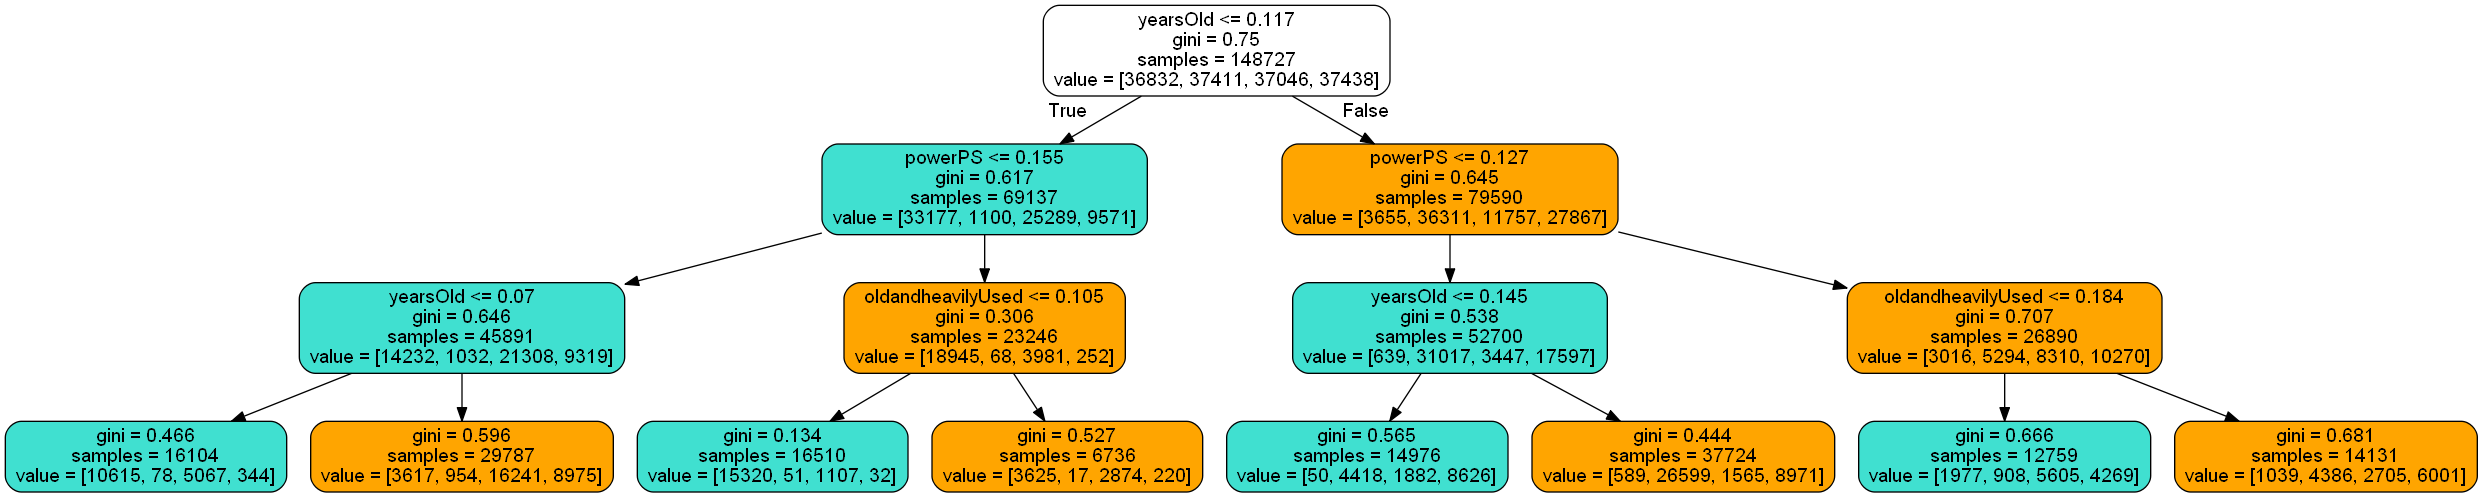

In [144]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

data_feature_names=X_all.columns

dot_data = tree.export_graphviz(clf_gini,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')
Image(graph.create_png())

In [145]:
y_pred = clf_gini.predict(X_test)
y_pred

array([2, 0, 0, ..., 1, 3, 1], dtype=int64)

In [146]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  62.315434887848966


In [147]:
predictions = clf_gini.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 17445.0
False positives: 7476.0
True Negatives: 44344.0
False Negatives: 29891.0
precision: 0.7000120380402071
recall: 0.36853557546053745
f1score: 0.4828597921308662


Decision Tree with criterion as information gain

In [148]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Visualization of the Decision Tree with criterion as information gain

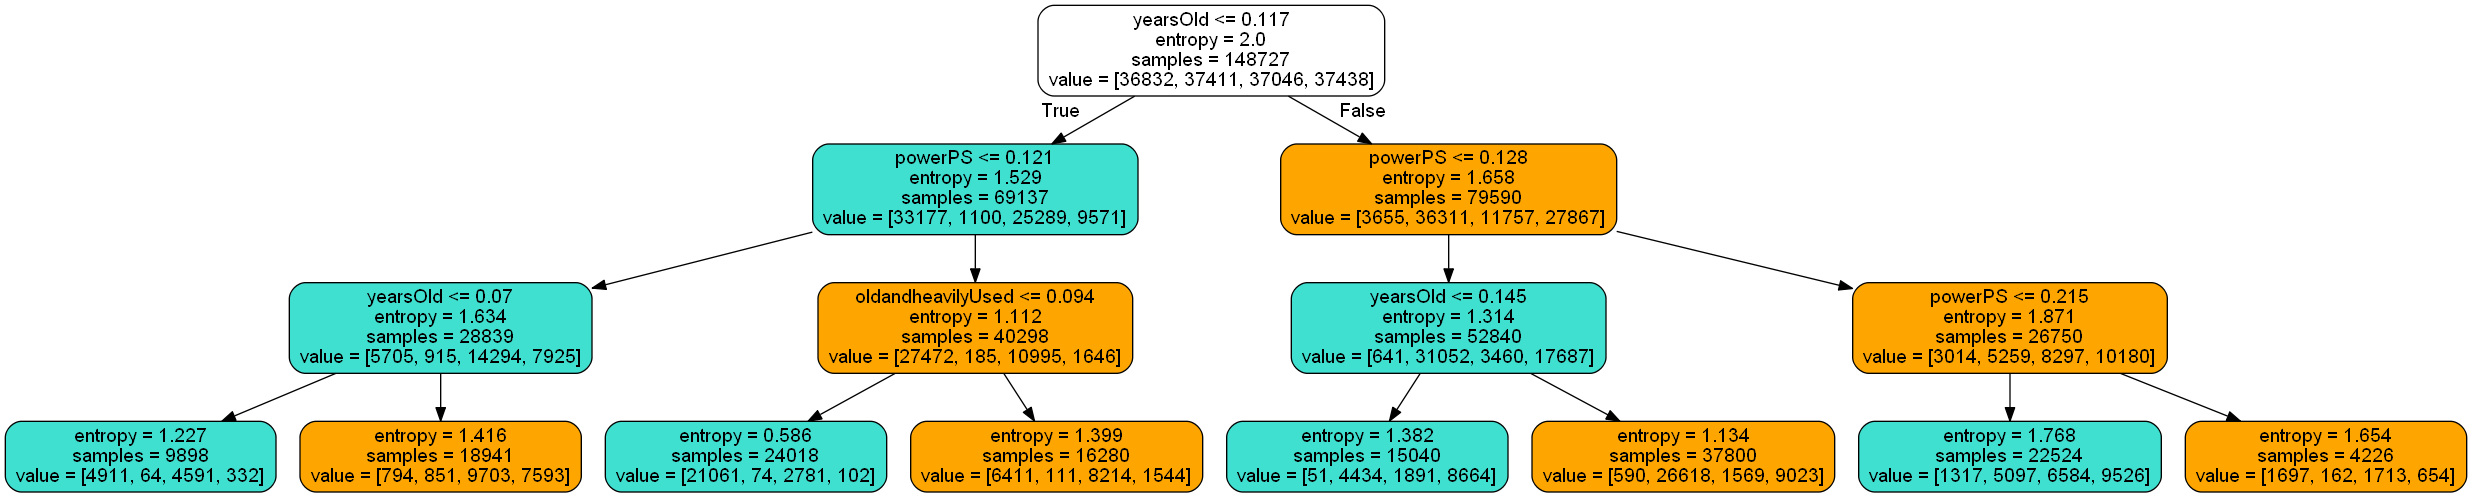

In [149]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

data_feature_names=X_all.columns

dot_data = tree.export_graphviz(clf_entropy,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')
Image(graph.create_png())

In [150]:
y_pred = clf_entropy.predict(X_test)
y_pred
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  60.8500080684202


In [151]:
predictions = clf_entropy.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 17457.0
False positives: 7512.0
True Negatives: 42879.0
False Negatives: 31308.0
precision: 0.6991469422083383
recall: 0.357982159335589
f1score: 0.4735128977134022


Analyzing the evaluation of the two decision trees
<br>
As it is clear, the f1-score and accuracy of both decision trees are very close. However, since the “information gain” results in a better precision, it seems like a better choice for our purpose. 


Data Interpretation for our Story:
<br>
The decision tree implementation in general, and the visualised version in particular, is a very good tool for making sense of the features that can influence our price. As an example, “old and heavilyUsed” cars are detected strongly as cheaper ones after implementing the decision tree algorithm. Another example is powerPS, which can be a very good indicator for the price of the used cars.
<br>


###### Random Forests
Build a Random Forest  classifier to predict a categorical variable in the given dataset and build a story around our dataset.
<br>
Random Forest algorithm is the supervised learning algorithm, Decision tree is the building block of random forest, it randomly selects certain variables on x axis to create n number of trees and provides accuracy based on decision provided by maximum number of trees in the forest.


Without Feature Importance

In [152]:
# Defining the Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [153]:
# TP, TN, FP , FN, Recall and F1 Score

predictions = RF.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 19810.0
False positives: 5293.0
True Negatives: 56282.0
False Negatives: 17771.0
precision: 0.7891487073258177
recall: 0.5271280700353902
f1score: 0.6320592176631995


In [154]:
#Classification Report : The classification_report function builds a text report 
#showing the main classification metrics
p = RF.predict(X_test)
print(classification_report(y_test, p))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88     24765
          1       0.79      0.80      0.79     24766
          2       0.73      0.73      0.73     24693
          3       0.67      0.65      0.66     24928

avg / total       0.77      0.77      0.77     99152



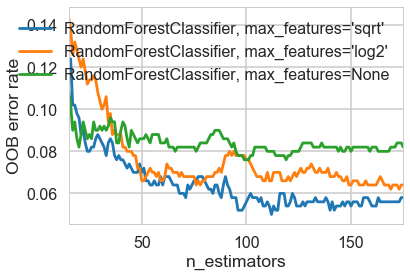

In [155]:
#Out-of-bag (OOB) error : The out-of-bag (OOB) error is the average error for each  calculated using predictions from the
# trees that do not contain  in their respective bootstrap sample. 
# This allows the RandomForestClassifier to be fit and validated whilst being trained 

import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

Errors = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in Errors)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in Errors:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [156]:
#  Model Accuracy, how often is the classifier correct?
accuracy_RF = round(RF.score(X_train, y_train) * 100, 2)
accuracy_RF

87.26

<b>Observation</b>
We wanted to create different catalogues for different customer class. 
<br>
Therefore, we used Decision tress classifier and Ranadom forest classifier to help us classifying all the cars in different classes - economy class and luxury class.
<br>
Out of this Random forest classifier gave us more accuracy as compared to Decision tree classifier.Random*


<b>Model Tuning</b>
<br>
<b> Feature Importance for Random Forest</b>
<br>
Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance

C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Feature Importance from Random Forest

[3.84876272e-04 3.62723159e-05 9.62320759e-04 2.69653117e-06
 8.41416392e-05 1.27054720e-04 2.11258495e-04 0.00000000e+00
 2.25030298e-03 1.82299768e-01 1.47009004e-01 7.89457298e-02
 2.51932400e-01 3.83492760e-02 0.00000000e+00 5.21571696e-02
 1.15795994e-04 1.76609967e-06 1.75532443e-05 8.72008272e-06
 9.72305446e-06 4.66454953e-02 5.41669920e-03 4.44655154e-04
 4.88977586e-04 1.07607933e-05 1.62530056e-02 1.37057451e-03
 1.98343856e-03 1.69368206e-04 2.98468215e-04 6.35415174e-04
 9.22506244e-04 5.40365579e-03 1.27174018e-04 3.39505065e-05
 1.63072956e-04 3.22361899e-04 2.27376866e-05 4.34395059e-04
 7.32633021e-03 4.75352880e-03 7.94281944e-03 7.22980970e-03
 7.10053090e-04 4.62283287e-03 0.00000000e+00 1.31362083e-01]
The 15 most influencing features are
%d. feature %d (%f) (1, 'date_crawled', 0.2519323998092388)
%d. feature %d (%f) (2, 'dateCreated', 0.1822997682031151)
%d. feature %d (%f) (3, 'postalCode', 0.14700900437709571)
%d. feature %

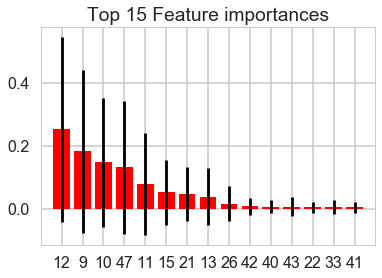

Mean Feature Importance 0.020833


In [157]:

# Run Random Forest Classification Estimator to see what the best contributing features for decision making.
from sklearn.ensemble import RandomForestClassifier
import numpy as np

estimator = RandomForestClassifier(n_estimators=300, max_depth=3, n_jobs=15)
estimator.fit(X_train,y_train) 

print ("Feature Importance from Random Forest\n")
print (estimator.feature_importances_)

importances = estimator.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in estimator.estimators_], axis=0) 
indices = np.argsort(importances)[::-1]

print("The 15 most influencing features are") 
top_features = []

for f in range(15): 
    # print("%d. \t %s(%f)" % (f + 1, data_clean.columns[indices[f-1]], importances[indices[f]]))
    print("%d. feature %d (%f)",(f + 1, final_data.columns[indices[f]], importances[indices[f]]))
    top_features.append(indices[f])
    
    
print (top_features)
    
#Plot the feature importances of the forest 
indices=indices[:15] 
plt.figure() 
plt.title("Top 15 Feature importances") 
plt.bar(range(15), importances[indices], color="r", yerr=std[indices], align="center") 
plt.xticks(range(15), indices) 
plt.xlim([-1, 15]) 
plt.show() 
#Mean Feature Importance 
print ("Mean Feature Importance %.6f" %np.mean(importances))

<b>Random forest With Feature Importance</b>

In [158]:
# Excluded the date and time related fields 
from sklearn.linear_model import LogisticRegression
columns = ['mercedes_benz', 'year_registered', 'diesel', 'postalCode',
       'electric', 'astra', 'a4','lpg','5er','coupe','passat']

X_RF = final_data[columns]
Y_RF = final_data[label_field]

X_train, X_test, y_train, y_test = train_test_split(X_RF,Y_RF,test_size=0.4,random_state=1)

In [159]:
RF_withFeatureImp = RandomForestClassifier()
RF_withFeatureImp.fit(X_train,y_train)

C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [160]:
predictions = RF_withFeatureImp.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 1.0
False positives: 1.0
True Negatives: 57793.0
False Negatives: 41361.0
precision: 0.5
recall: 2.4176780619892654e-05
f1score: 4.835122328594913e-05


In [161]:
p1 = RF_withFeatureImp.predict(X_test)
print(classification_report(y_test, p1))

                    precision    recall  f1-score   support

         expensive       0.68      0.70      0.69     24614
    less_expensive       0.65      0.67      0.66     24953
mid_high_expensive       0.51      0.49      0.50     24595
 mid_low_expensive       0.49      0.47      0.48     24990

       avg / total       0.58      0.58      0.58     99152



In [162]:
accuracy_RF = round(RF_withFeatureImp.score(X_train, y_train) * 100, 2)
accuracy_RF

88.4

<b>After doing feature enhancement we increased the accuracy from 87% to 88.4% for random forest</b>

###### Support Vector Machine : We usedSVM algorithm to classify the categories of expense range of the cars.

In [163]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
data.dtypes
label_field = ['expense_range']
Y = final_data[label_field]
training_fields = ['powerPS', 'kilometer', 'yearsOld', 'repaired','kodemonkeysrecommended']
training_fields = ['oldandheavilyUsedAndDamaged','peugeot', 'kia',
                   'fiat','seat','toyota','nissan','skoda','jaguar','porsche','oldandheavilyUsed',
                   'powerPS', 'kilometer', 'yearsOld', 'gearbox_category',"benzin","diesel","lpg",
                   "other","hybrid","cng","electric","smallcar","cabrio","van","Midsize","VehicleTypeother",
                   "suv","bus","coupe","golf","fabia","3er","polo","corsa","a4","passat","astra",
                   "5er","c_klasse","volkswagen","bmw","mercedes_benz","opel","audi","ford","renault","repaired",
                   "kodemonkeysrecommended"]
#training_fields = ['less_expensive','powerPS', 'kilometer', 'yearsOld', 'repaired']

X = final_data[training_fields]
scaled_X = scaler.fit_transform(X)

le = LabelEncoder()
le.fit(Y['expense_range'].astype(str))
Y['expense_range'] = le.transform(Y['expense_range'].astype(str))

Y_label = pd.DataFrame(Y, columns=label_field)
scaled_X = pd.DataFrame(scaled_X, columns=training_fields)
X.head()


X_all= scaled_X[training_fields[1:]]
training_fields[1:]

X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.4, random_state=0)

In [75]:
from sklearn import svm

#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_svm.predict(X_test)

C:\Users\Supreetha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.903199128610618


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

###### K-Nearest Neighbour

In [ ]:
# Since the dataset is huge, runs forever
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#We can observe above that we get maximum testing accuracy for k=# or k=#. 
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
#Fit the model
knn.fit(X_train,y_train)

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

Considering confusion matrix above:

True negative = #

False positive = #

True postive = #

Fasle negative = #

In [ ]:
print(classification_report(y_test,y_pred))

###### Naive Bayes
<br>
Perform Naive Bayes classification on the used car database that has been chosen for our machine learning project.

Problem formulation:
<br>
Given a pair of features from the dataset, perform supervised machine learning on the dataset to identify the probability of a resultant feature. We have chosen brand and model as the input features and the vehicle type as the outcome feature.
<br>



Story:
<br>
The story that we were able to tell from this exercise was to predict the most popularly sold body type of a car given the make and model of a car. Ie. If a Mercedez Benz C300 is given as input, the model should be able to predict sedan as the outcome.
<br>


In [164]:
# Create categorical for vehicle type
work_data.vehicleType = pd.Categorical(work_data.vehicleType)
work_data['vehicletype_coded'] = work_data.vehicleType.cat.codes
vehicle_array = work_data['vehicletype_coded'].tolist()
vehicle_array[:5]

[5, 5, 7, 2, 7]

In [166]:
# Create categorical for brand type
work_data.brand = pd.Categorical(work_data.brand)
work_data['brand_coded'] = work_data.brand.cat.codes
brand_array = work_data['brand_coded'].tolist()
brand_array[:5]

[37, 31, 2, 25, 19]

In [167]:
# Create categorical for model type
work_data.model = pd.Categorical(work_data.model)
work_data['model_coded'] = work_data.model.cat.codes
model_array = work_data['model_coded'].tolist()
model_array[:5]

[118, 103, 11, 8, 10]

In [168]:
input = zip(brand_array, model_array)
ilist = list(input)
ilist[:5]

[(37, 118), (31, 103), (2, 11), (25, 8), (19, 10)]

In [169]:

gnb = GaussianNB()
gnb.fit(ilist, vehicle_array)
prediction = gnb.predict([[37, 118]])
print(work_data.vehicleType[prediction])

5    van
Name: vehicleType, dtype: category
Categories (8, object): [Midsize, bus, cabrio, coupe, other, smallcar, suv, van]


In [170]:
gnb.score(ilist, vehicle_array)

0.3146736915995304

Observations
<br>
Give the large number of categoricals on the dataset it was seen that the accuracy of the training was a low value


<b>Decision tree Regressor with price as target variable.</b>
Above, we created a classifier variable "expense range" based on the price range and ran the logistic, decision tree, svm, knn and random forest treating our dataset as classification.
<br>
But we now ran the decision tree regressor as ours is a regression analysis 

In [30]:
reg_data=cleaned_data

In [31]:
# define a function to convert an object (categorical) feature into an int feature Simmilaer to lebel encoding
# 0 = most common category, highest int = least common.
def getObjectFeature(reg_data, col, datalength=247879):
    if reg_data[col].dtype!='object': # if it's not categorical..
        print('feature',col,'is not an object feature.')
        return reg_data
    elif len([i for i in reg_data[col].T.notnull() if i == True])!=datalength: # if there's missing data..
        print('feature',col,'is missing data.')
        return reg_data
    else:
        df = reg_data
        counts = df[col].value_counts() # get the counts for each label for the feature
        df[col] = [counts.index.tolist().index(i) for i in df[col]] # do the conversion
        return df # make the new (integer) column from the conversion
# and test the function...
reg_data_final = getObjectFeature(reg_data,'fuelType')
reg_data_final = getObjectFeature(reg_data,'year_registered')
reg_data_final = getObjectFeature(reg_data,'notRepairedDamage')
reg_data_final = getObjectFeature(reg_data,'vehicleType')
reg_data_final.head(10)

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,date_crawled,year_registered,month_registered,date_crawled_year,yearsOld
3,2016-03-17 16:54:04,1500,1,2001,manual,75,golf,150000,6,0,volkswagen,0,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016-03-17 16:54:04,6,6,2016,15
4,2016-03-31 17:25:20,3600,1,2008,manual,69,fabia,90000,7,1,skoda,0,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,2016-03-31 17:25:20,8,7,2016,8
5,2016-04-04 17:36:23,650,0,1995,manual,102,3er,150000,10,0,bmw,1,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,2016-04-04 17:36:23,18,10,2016,21
6,2016-04-01 20:48:51,2200,4,2004,manual,109,2_reihe,150000,8,0,peugeot,0,2016-04-01 00:00:00,67112,2016-04-05 18:18:39,2016-04-01 20:48:51,2,8,2016,12
10,2016-03-26 19:54:18,2000,0,2004,manual,105,3_reihe,150000,12,0,mazda,0,2016-03-26 00:00:00,96224,2016-04-06 10:45:34,2016-03-26 19:54:18,2,12,2016,12
11,2016-04-07 10:06:22,2799,2,2005,manual,140,passat,150000,12,1,volkswagen,1,2016-04-07 00:00:00,57290,2016-04-07 10:25:17,2016-04-07 10:06:22,1,12,2016,11
14,2016-03-21 12:57:01,17999,6,2011,manual,190,navara,70000,3,1,nissan,0,2016-03-21 00:00:00,4177,2016-04-06 07:45:42,2016-03-21 12:57:01,13,3,2016,5
17,2016-03-20 10:25:19,1750,1,2004,automatic,75,twingo,150000,2,0,renault,0,2016-03-20 00:00:00,65599,2016-04-06 13:16:07,2016-03-20 10:25:19,2,2,2016,12
18,2016-03-23 15:48:05,7550,3,2007,manual,136,c_max,150000,6,1,ford,0,2016-03-23 00:00:00,88361,2016-04-05 18:45:11,2016-03-23 15:48:05,5,6,2016,9
19,2016-04-01 22:55:47,1850,3,2004,manual,102,a_klasse,150000,1,0,mercedes_benz,0,2016-04-01 00:00:00,49565,2016-04-05 22:46:05,2016-04-01 22:55:47,2,1,2016,12


In [36]:
# list all the features we want. This is still arbitrary...
included_features = ['vehicleType','powerPS','kilometer','year_registered',
                    'yearsOld','notRepairedDamage']
# define the training data X...
Xreg = reg_data_final[included_features]
Yreg = reg_data_final[['price']]

# transform categorical data if included in X...
for col in list(Xreg):
    if Xreg[col].dtype=='object':
        Xreg = getObjectFeature(Xreg, col)
Xreg.head()

X_train, X_test, y_train, y_test = train_test_split(Xreg, Yreg, test_size=0.3, random_state=1)

In [37]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
y_head=tree_reg.predict(X_test)
y_head

array([ 7.15704597,  7.27306708,  8.8699018 , ...,  8.58215201,
        7.33496294, 10.02122614])

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#mean_squared_error(y_train, y_head)
rms = sqrt(mean_squared_error(y_test, y_head))
rms

0.5766479405198449

<b>Random forest regressor</b>

In [39]:
# Fitting the Regression Model to the dataset with 15 tree prediction
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=15,random_state=0)
y_pred=regressor.fit(X_train, y_train)

C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [40]:
from sklearn.ensemble import RandomForestRegressor as rfr
# define the number of estimators to consider
estimators = [2, 5, 10, 20, 30]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in y_train['price']]
np.random.seed(11111)
# for each number of estimators, fit the model and find the results for 8-fold cross validation
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X_train,yt,cv=10,scoring='explained_variance')
    print('estimators:',i)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print("")
    mean_rfrs.append(scores_rfr.mean())

estimators: 2
Est. explained variance: 0.77 (+/- 0.02)

estimators: 5
Est. explained variance: 0.79 (+/- 0.02)

estimators: 10
Est. explained variance: 0.79 (+/- 0.02)

estimators: 20
Est. explained variance: 0.80 (+/- 0.02)

estimators: 30
Est. explained variance: 0.80 (+/- 0.02)



In [42]:
import statsmodels.api as sm    
model = sm.OLS(y_test, y_head)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.541e+07
Date:                Tue, 23 Oct 2018   Prob (F-statistic):               0.00
Time:                        21:13:51   Log-Likelihood:                -64568.
No. Observations:               74364   AIC:                         1.291e+05
Df Residuals:                   74363   BIC:                         1.291e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9988      0.000   3924.953      0.000       0.998       0.999
==============================================================================
Omnibus:                    37065.438   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8895261.959
Skew:                          -1.242   Prob(JB):                         0.00
Kurtosis:                      56.523   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Conclusion:<b>
We ran classifier, on our target variable "expense range"
<br>
Of the algorithms that we ran, we got highest accuracy in SVM
<br>
We then ran the Linear Regression, Multi-linear regression, Decision tree regressor ( which is a single tree regressor)
and Random Forest regressor.
<br>
Of the regression techniques we performed, Random forest regressor showed better accuracy.
<br>
So we would recommend to use RANDOM FOREST REGRESSOR to predict the price of the car
    
    

    
    